## 2. Data Exploration

In [6]:
import numpy as np
import gc
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

root = 'C:/Users/Pratham/Documents/GitHub/instacart-customer-purchase-prediction/data/'

### Importing CSVs

cant import everything at once . not enough memory

In [ ]:
# aisles = pd.read_csv(root + 'aisles.csv')
# departments = pd.read_csv(root + 'departments.csv')
# orders = pd.read_csv(root + 'orders.csv')
# products = pd.read_csv(root + 'products.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')

In [ ]:
# aisles.head()

In [ ]:
# departments.head()

In [ ]:
# products.head()

In [ ]:
# orders.head()

In [ ]:
order_products_prior.head()

In [ ]:
order_products_train.head()

### Merging data

In [ ]:
order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)

order_products.shape

deleting extra dfs to clear memory

In [ ]:
del order_products_prior,order_products_train
gc.collect()

In [ ]:

products = pd.read_csv(root + 'products.csv')

In [ ]:
order_products = order_products.merge(products, on ='product_id', how='left')



In [ ]:

del products
gc.collect()

In [ ]:
aisles = pd.read_csv(root + 'aisles.csv')
# departments = pd.read_csv(root + 'departments.csv')
# orders = pd.read_csv(root + 'orders.csv')
# products = pd.read_csv(root + 'products.csv')

In [ ]:

order_products = order_products.merge(aisles, on ='aisle_id', how='left')

del aisles
gc.collect()


In [ ]:
# aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
# orders = pd.read_csv(root + 'orders.csv')
# products = pd.read_csv(root + 'products.csv')

In [ ]:
import gc

order_products = order_products.merge(departments, on ='department_id', how='left')

del departments
gc.collect()

In [ ]:
# aisles = pd.read_csv(root + 'aisles.csv')
# departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
# products = pd.read_csv(root + 'products.csv')

In [ ]:
import gc

order_products = order_products.merge(orders, on='order_id', how='left')

del orders
gc.collect()

In [ ]:

order_products.shape

In [ ]:
order_products.head()

In [ ]:
order_products.info()

optimizing the memory consumption

In [ ]:
import numpy as np

def optimize_dataframe_memory(data):
    """
    Optimize the memory usage of a DataFrame by adjusting data types safely.

    Parameters:
        data (pd.DataFrame): Input DataFrame

    Returns:
        pd.DataFrame: Optimized DataFrame with reduced memory usage
    """
    initial_memory = data.memory_usage().sum() / 1024**2
    print(f"Initial memory usage: {initial_memory:.2f} MB")

    for column in data.columns:
        col_type = data[column].dtype

        if col_type in ["int64", "int32", "int16"]:
            min_val, max_val = data[column].min(), data[column].max()

            # Preventing integer overflow by only downcasting within safe limits
            if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                data[column] = data[column].astype(np.int8)
            elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                data[column] = data[column].astype(np.int16)
            elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                data[column] = data[column].astype(np.int32)

        elif col_type in ["float64", "float32"]:
            min_val, max_val = data[column].min(), data[column].max()

            # Prevent float precision issues by avoiding downcasting to float16
            if min_val >= np.finfo(np.float32).min and max_val <= np.finfo(np.float32).max:
                data[column] = data[column].astype(np.float32)

    optimized_memory = data.memory_usage().sum() / 1024**2
    print(f"Optimized memory usage: {optimized_memory:.2f} MB")
    print(f"Memory reduction: {100 * (1 - optimized_memory / initial_memory):.2f}% of the original size")

    return data


In [ ]:
order_products = optimize_dataframe_memory(order_products)

In [ ]:
# order_products.describe()

In [ ]:
print(order_products["add_to_cart_order"].describe())
print(order_products["add_to_cart_order"].unique())  # Check for negative values


In [ ]:
del optimize_dataframe_memory
%whos

saving the combined dataframe as a checkpoint.

faster loading of data next time

## EDA

In [ ]:
# order_products.to_parquet(root + 'order_products.parquet')

In [7]:
order_products = pd.read_parquet(root + 'order_products.parquet')

In [ ]:
print(order_products["add_to_cart_order"].describe())
print(order_products["add_to_cart_order"].unique())  # Check for negative values


count    3.381911e+07
mean     8.367738e+00
std      7.139540e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]


In [ ]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


<ipython-input-6-113b6780c8e0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="eval_set", y="reordered", data=reorder_rate, palette=["blue", "orange"])


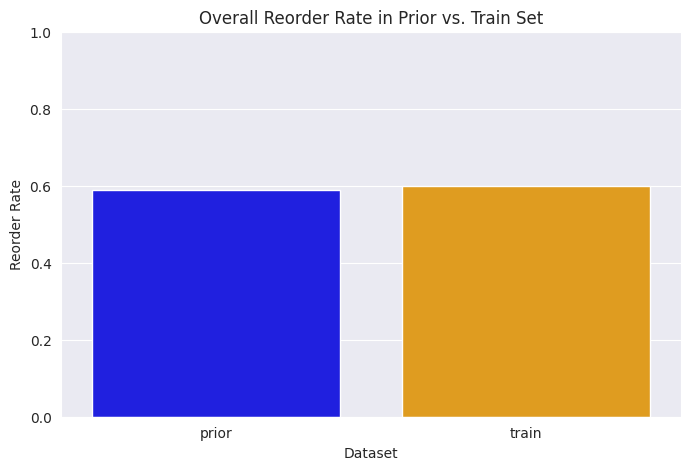

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute reorder rate for prior and train sets using order_products DataFrame
reorder_rate = order_products.groupby("eval_set")["reordered"].mean().reset_index()

# Filter only 'prior' and 'train' sets since 'test' has no reorder labels
reorder_rate = reorder_rate[reorder_rate["eval_set"].isin(["prior", "train"])]

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="eval_set", y="reordered", data=reorder_rate, palette=["blue", "orange"])
plt.ylim(0, 1)
plt.ylabel("Reorder Rate")
plt.xlabel("Dataset")
plt.title("Overall Reorder Rate in Prior vs. Train Set")
plt.show()


### Time based

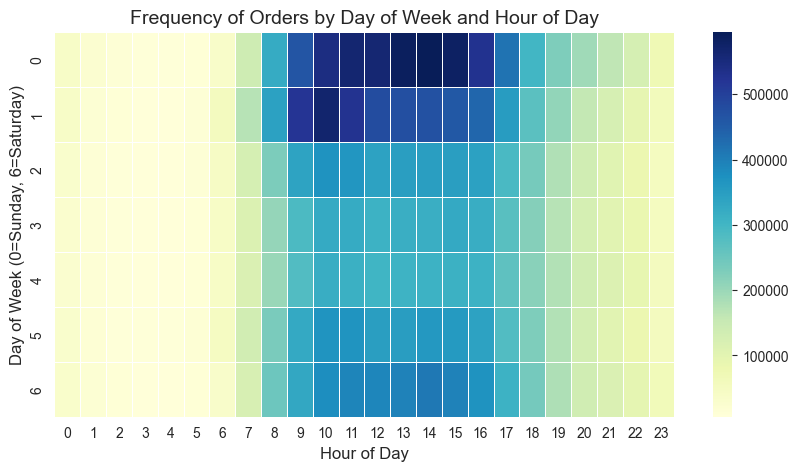

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute order frequency grouped by Day of Week and Hour of Day
heatmap_data = order_products.groupby(["order_dow", "order_hour_of_day"])["order_id"].count().reset_index()

# Pivot the table to make it suitable for a heatmap
heatmap_data = heatmap_data.pivot(index="order_dow", columns="order_hour_of_day", values="order_id")

# Plot heatmap
plt.figure(figsize=(10, 5))
ax = sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

# Formatting
ax.set_title("Frequency of Orders by Day of Week and Hour of Day", fontsize=14)
ax.set_xlabel("Hour of Day", fontsize=12)
ax.set_ylabel("Day of Week (0=Sunday, 6=Saturday)", fontsize=12)
ax.tick_params(axis="both", labelsize=10)

# Adjust colorbar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Save and Show
plt.show()


<ipython-input-7-f992b3e1ceaf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_dow", y="reordered", data=reorder_rate_dow, palette="Blues_r")


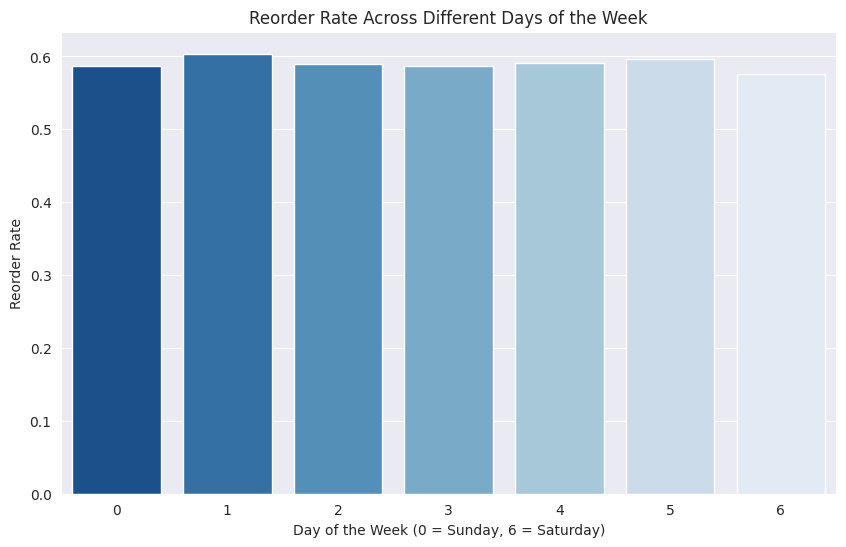

In [ ]:
# Ensure necessary libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns

# Compute reorder rate for each day of the week
reorder_rate_dow = order_products.groupby("order_dow")["reordered"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="order_dow", y="reordered", data=reorder_rate_dow, palette="Blues_r")

# Set labels and title
plt.xlabel("Day of the Week (0 = Sunday, 6 = Saturday)")
plt.ylabel("Reorder Rate")
plt.title("Reorder Rate Across Different Days of the Week")

# Show plot
plt.show()


<ipython-input-8-0574903cd0b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_hour_of_day", y="reordered", data=reorder_rate_hour, palette="Blues_r")


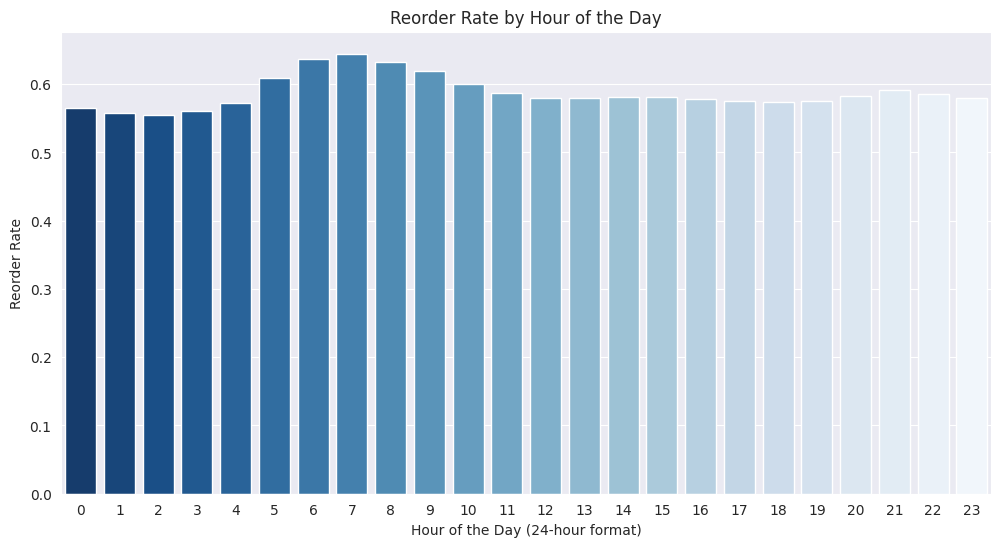

In [ ]:
# Compute reorder rate for each hour of the day
reorder_rate_hour = order_products.groupby("order_hour_of_day")["reordered"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="order_hour_of_day", y="reordered", data=reorder_rate_hour, palette="Blues_r")

# Set labels and title
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Reorder Rate")
plt.title("Reorder Rate by Hour of the Day")

# Show plot
plt.show()


<ipython-input-9-8f408e089cdd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="days_since_prior_order", y="reordered", data=reorder_rate_days, palette="Blues_r")


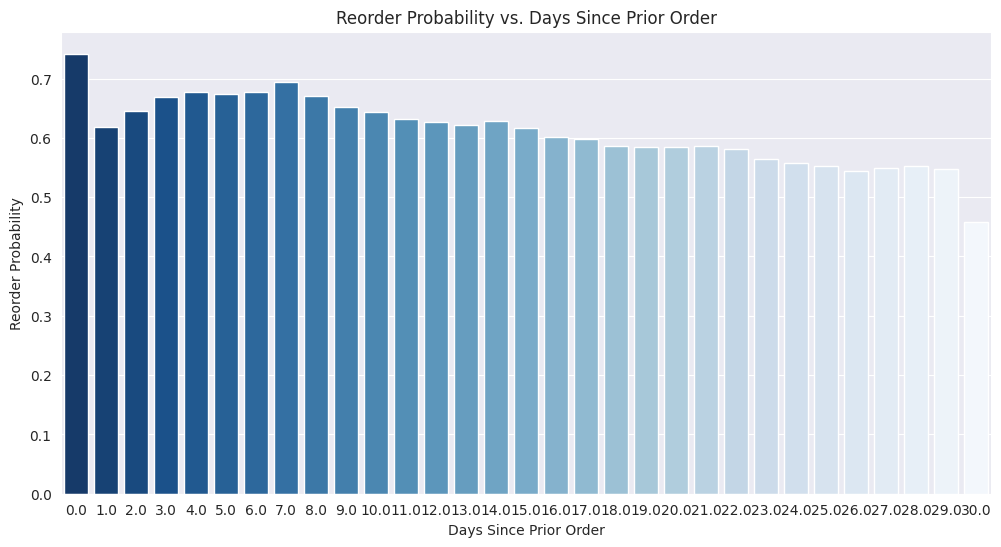

In [ ]:
# Ensure necessary libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert data types to avoid NotImplementedError
order_products["days_since_prior_order"] = order_products["days_since_prior_order"].astype(np.float32)
order_products["reordered"] = order_products["reordered"].astype(np.int32)

# Compute reorder probability based on days since prior order
reorder_rate_days = order_products.groupby("days_since_prior_order")["reordered"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="days_since_prior_order", y="reordered", data=reorder_rate_days, palette="Blues_r")

# Set labels and title
plt.xlabel("Days Since Prior Order")
plt.ylabel("Reorder Probability")
plt.title("Reorder Probability vs. Days Since Prior Order")

# Show plot
plt.show()


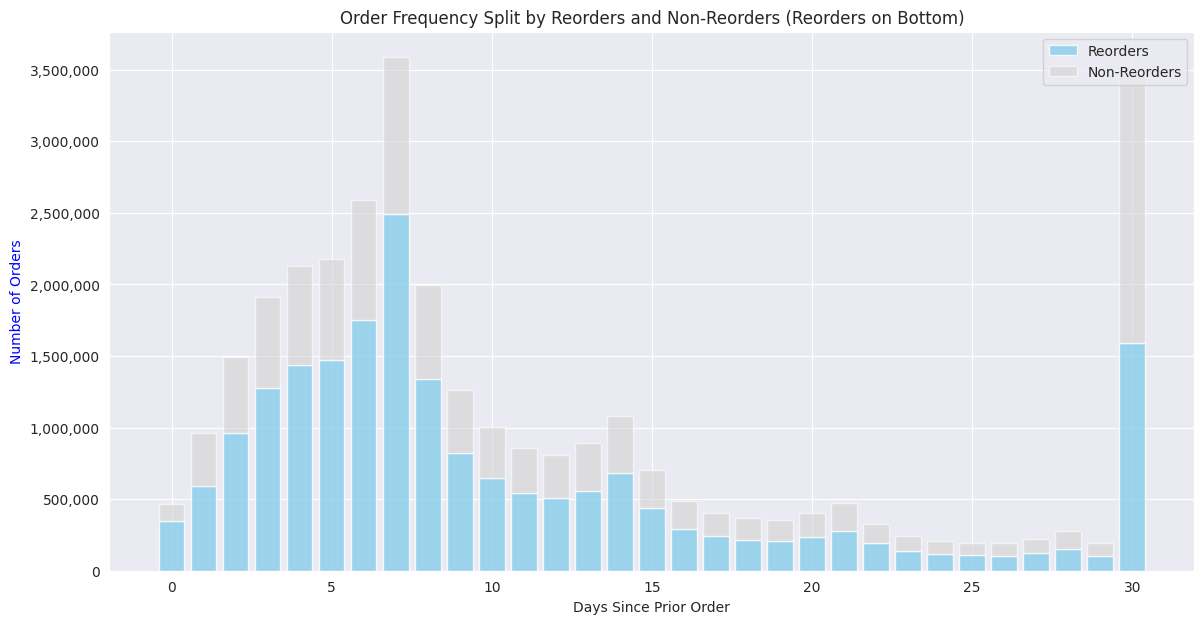

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute count of reorders and non-reorders per "days_since_prior_order"
order_counts_split = order_products.groupby(["days_since_prior_order", "reordered"]).size().unstack(fill_value=0)

# Initialize figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot (Stacked: Reorders at the bottom, Non-Reorders on top)
ax1.bar(order_counts_split.index, order_counts_split[1], color="skyblue", alpha=0.8, label="Reorders")
ax1.bar(order_counts_split.index, order_counts_split[0], color="lightgray", alpha=0.6, label="Non-Reorders", bottom=order_counts_split[1])

# Labels and Title
ax1.set_xlabel("Days Since Prior Order")
ax1.set_ylabel("Number of Orders", color="blue")
ax1.set_title("Order Frequency Split by Reorders and Non-Reorders (Reorders on Bottom)")
ax1.legend(loc="upper right")

# Format y-axis to display full numbers instead of scientific notation
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show plot
plt.show()


### Departments

In [ ]:
### Analyzing Aisles and Departments Based on Orders and Reorders

# Compute reorder ratio per department
department_stats = order_products.groupby("department")['reordered'].agg(['count', 'sum'])
department_stats.rename(columns={'count': 'total_orders', 'sum': 'total_reorders'}, inplace=True)
department_stats['reorder_ratio'] = department_stats.total_reorders / department_stats.total_orders

# Reset index to make "department" a column
department_stats.reset_index(inplace=True)


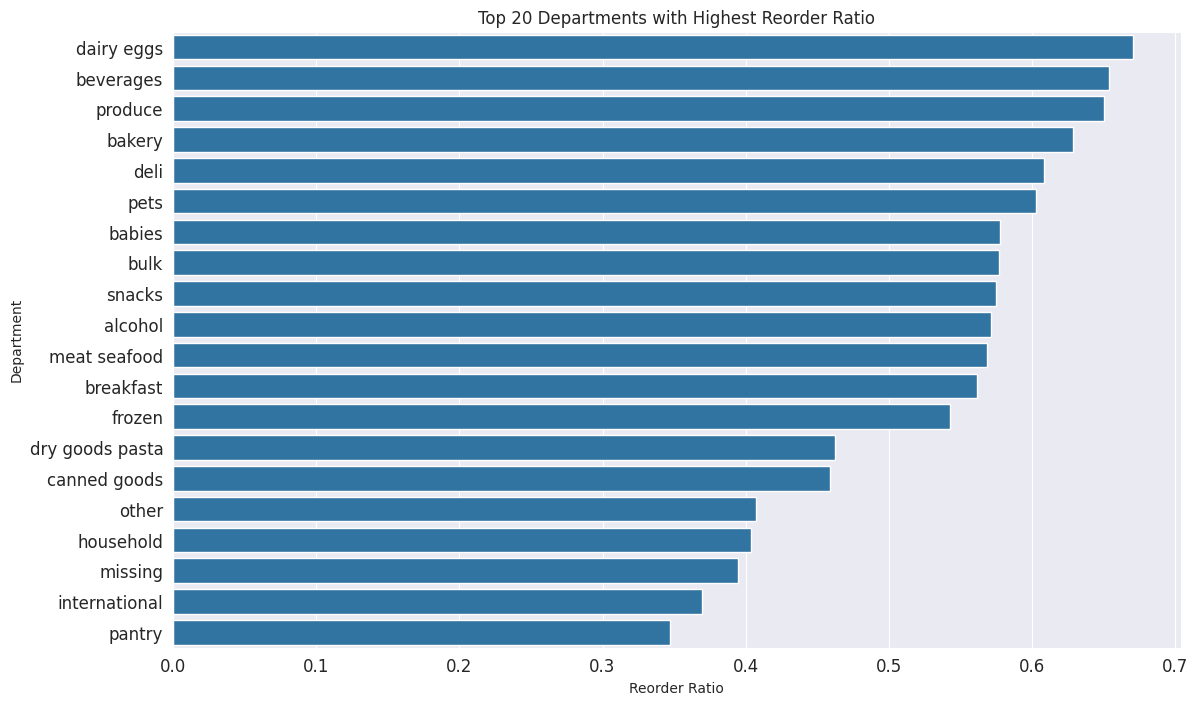

In [ ]:

# Departments with the highest reorder ratio
department_stats.sort_values('reorder_ratio', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(y=department_stats.department[:20], x=department_stats.reorder_ratio[:20], color=color[0], ax=ax)
ax.set_xlabel("Reorder Ratio")
ax.set_ylabel("Department")
ax.set_title("Top 20 Departments with Highest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()



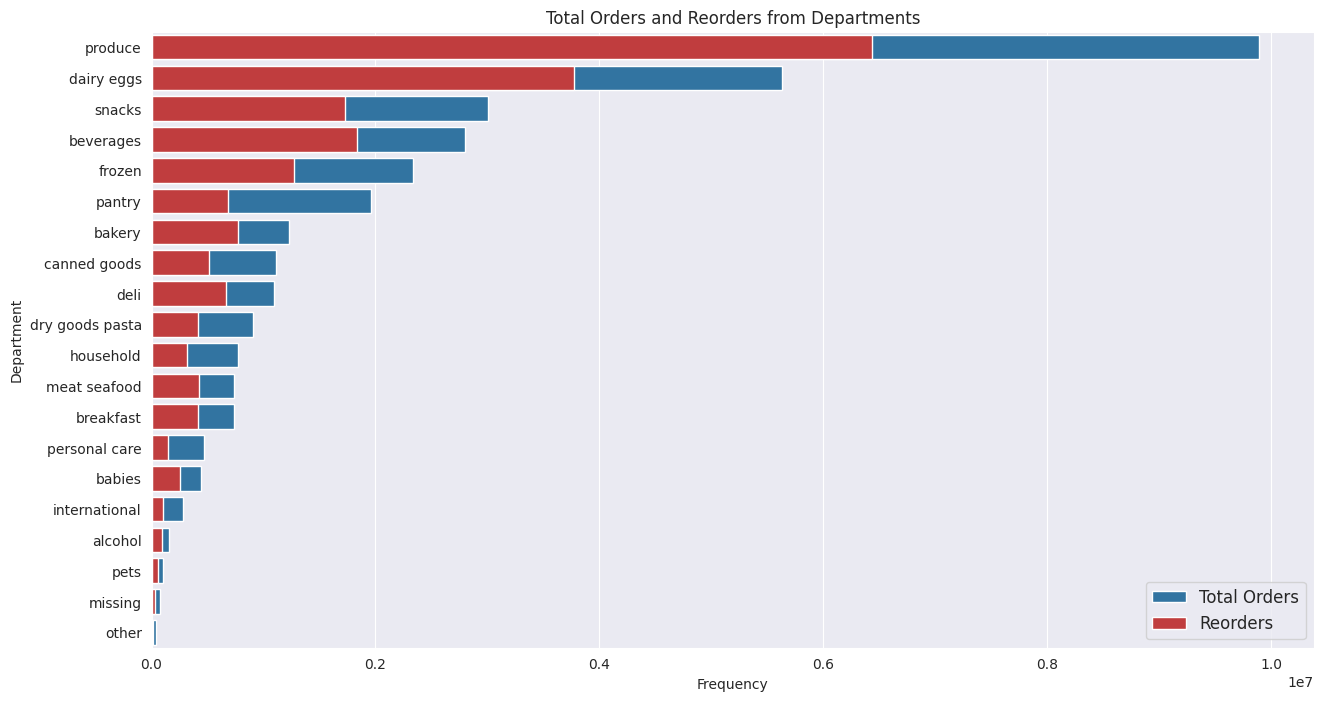

In [ ]:
# Compute and visualize total orders and reorders for departments
department_stats.sort_values('total_orders', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(y=department_stats.department[:20], x=department_stats.total_orders[:20], color=color[0], label="Total Orders", ax=ax)
sns.barplot(y=department_stats.department[:20], x=department_stats.total_reorders[:20], color=color[3], label="Reorders", ax=ax)
ax.set_xlabel("Frequency")
ax.set_ylabel("Department")
ax.set_title("Total Orders and Reorders from Departments")
ax.legend(loc='lower right', prop={'size': 12})
plt.show()




### Aisles

In [ ]:
### Analyzing Aisles Based on Orders and Reorders

# Compute reorder ratio per aisle
aisle_stats = order_products.groupby("aisle")['reordered'].agg(['count', 'sum'])
aisle_stats.rename(columns={'count': 'total_orders', 'sum': 'total_reorders'}, inplace=True)
aisle_stats['reorder_ratio'] = aisle_stats.total_reorders / aisle_stats.total_orders


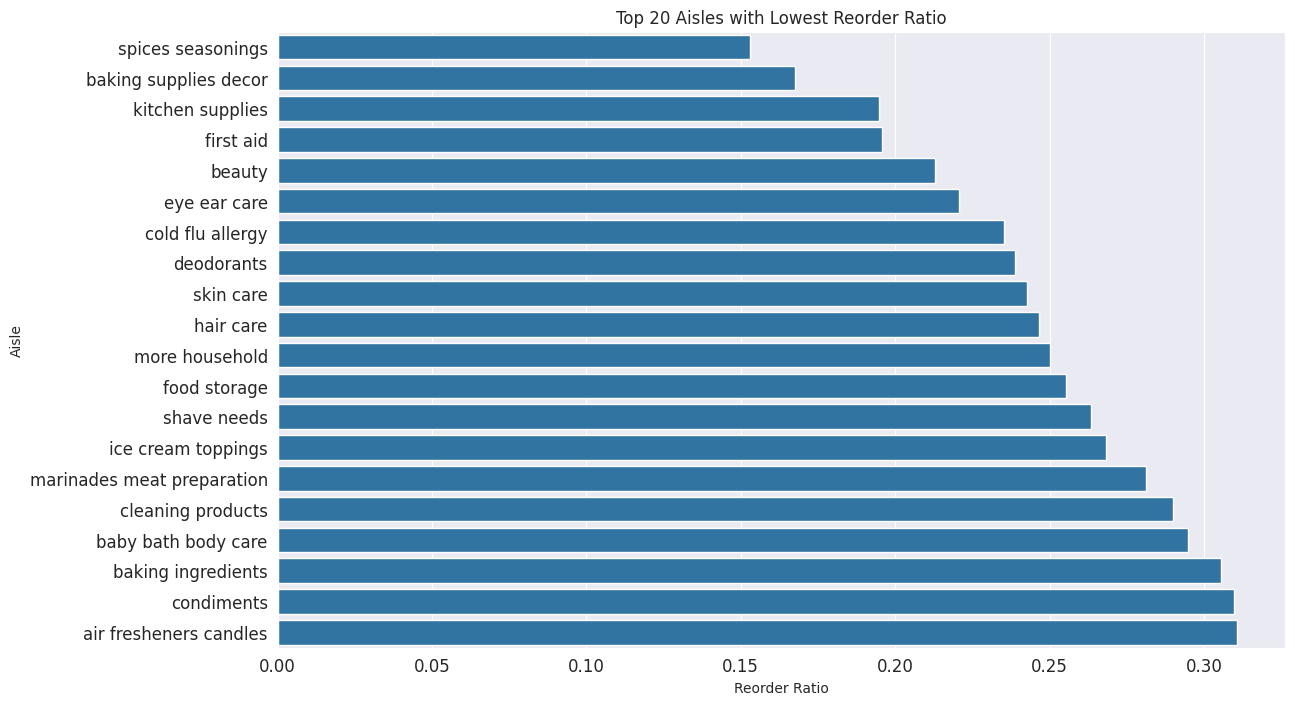

In [ ]:

# Aisles with the lowest reorder ratio
aisle_stats.sort_values('reorder_ratio', ascending=True, inplace=True)
aisle_stats.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(y=aisle_stats.aisle[:20], x=aisle_stats.reorder_ratio[:20], color=color[0], ax=ax)
ax.set_xlabel("Reorder Ratio")
ax.set_ylabel("Aisle")
ax.set_title("Top 20 Aisles with Lowest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()



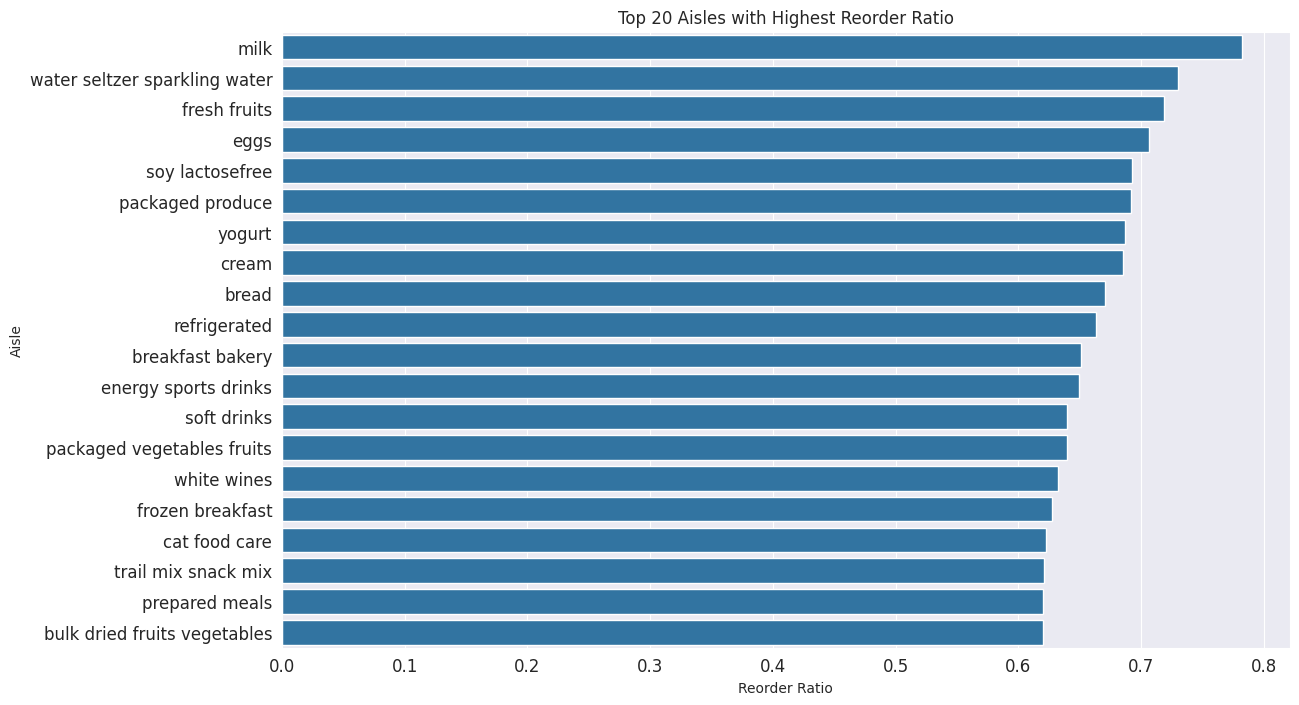

In [ ]:
# Aisles with the highest reorder ratio
aisle_stats.sort_values('reorder_ratio', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(y=aisle_stats.aisle[:20], x=aisle_stats.reorder_ratio[:20], color=color[0], ax=ax)
ax.set_xlabel("Reorder Ratio")
ax.set_ylabel("Aisle")
ax.set_title("Top 20 Aisles with Highest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()



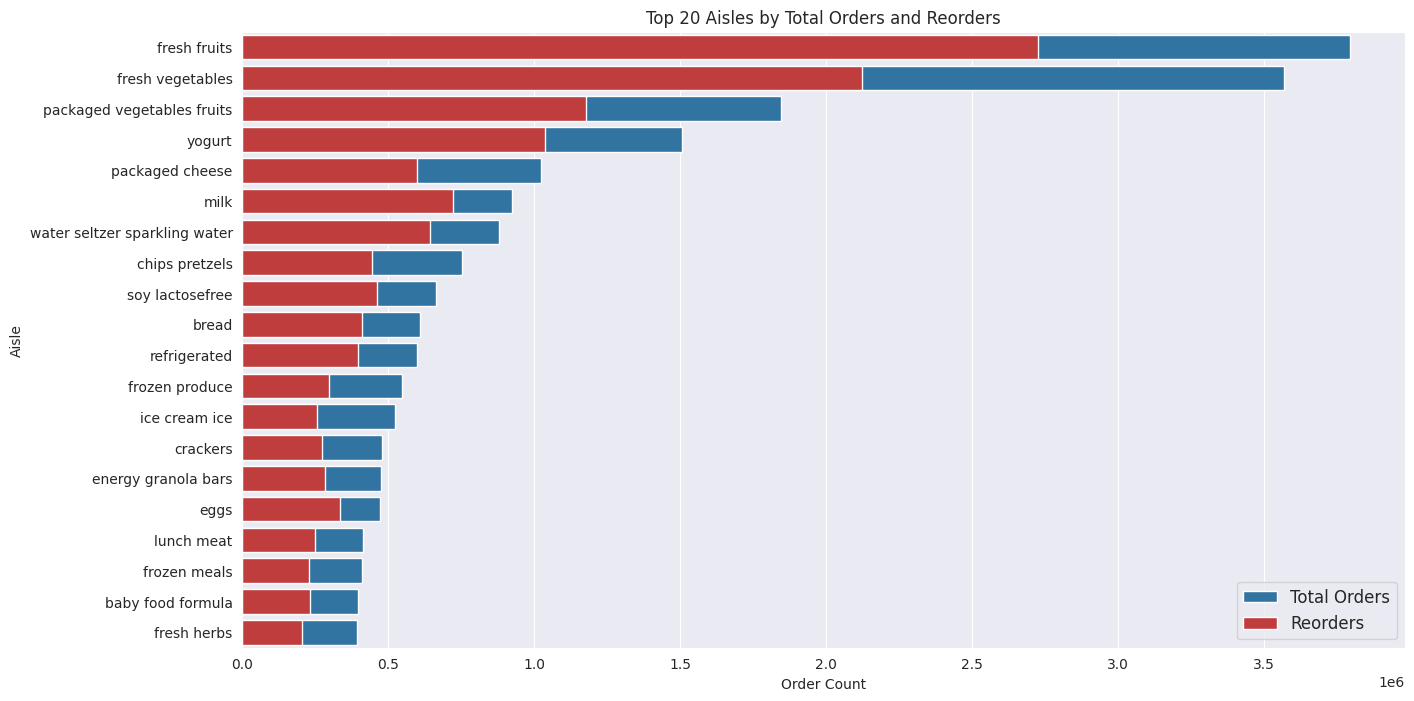

In [ ]:
# Compute and visualize total orders and reorders for top aisles
aisle_stats.sort_values('total_orders', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(y=aisle_stats.aisle[:20], x=aisle_stats.total_orders[:20], color=color[0], label="Total Orders", ax=ax)
sns.barplot(y=aisle_stats.aisle[:20], x=aisle_stats.total_reorders[:20], color=color[3], label="Reorders", ax=ax)
ax.set_xlabel("Order Count")
ax.set_ylabel("Aisle")
ax.set_title("Top 20 Aisles by Total Orders and Reorders")
ax.legend(loc='lower right', prop={'size': 12})
plt.show()

### Products

In [ ]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

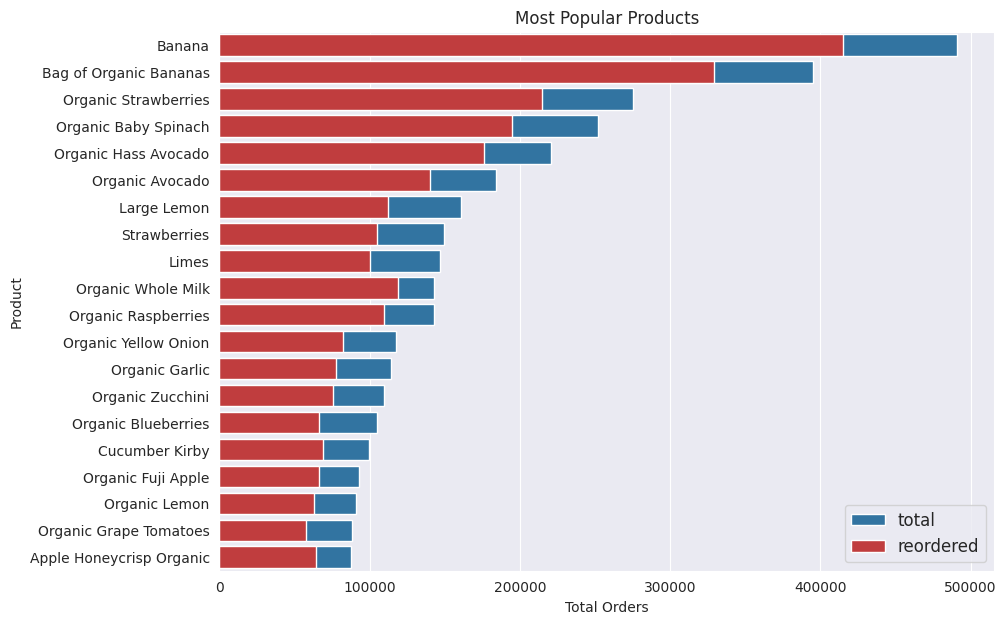

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


In [ ]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


In [ ]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


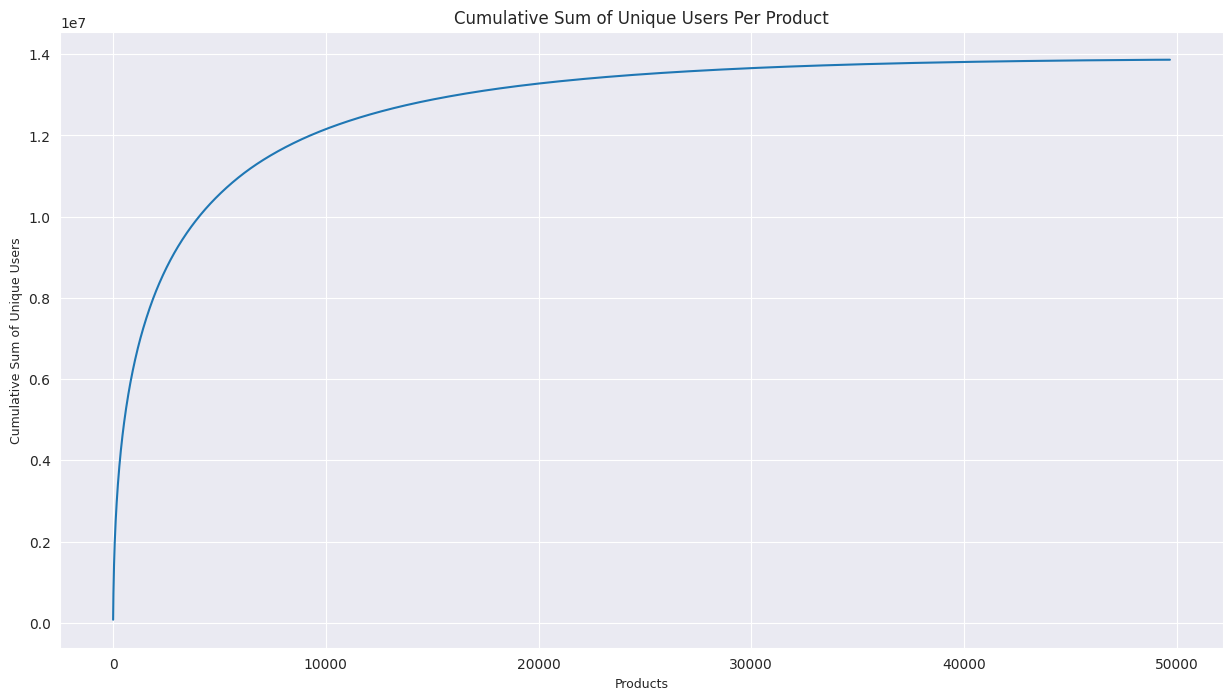

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

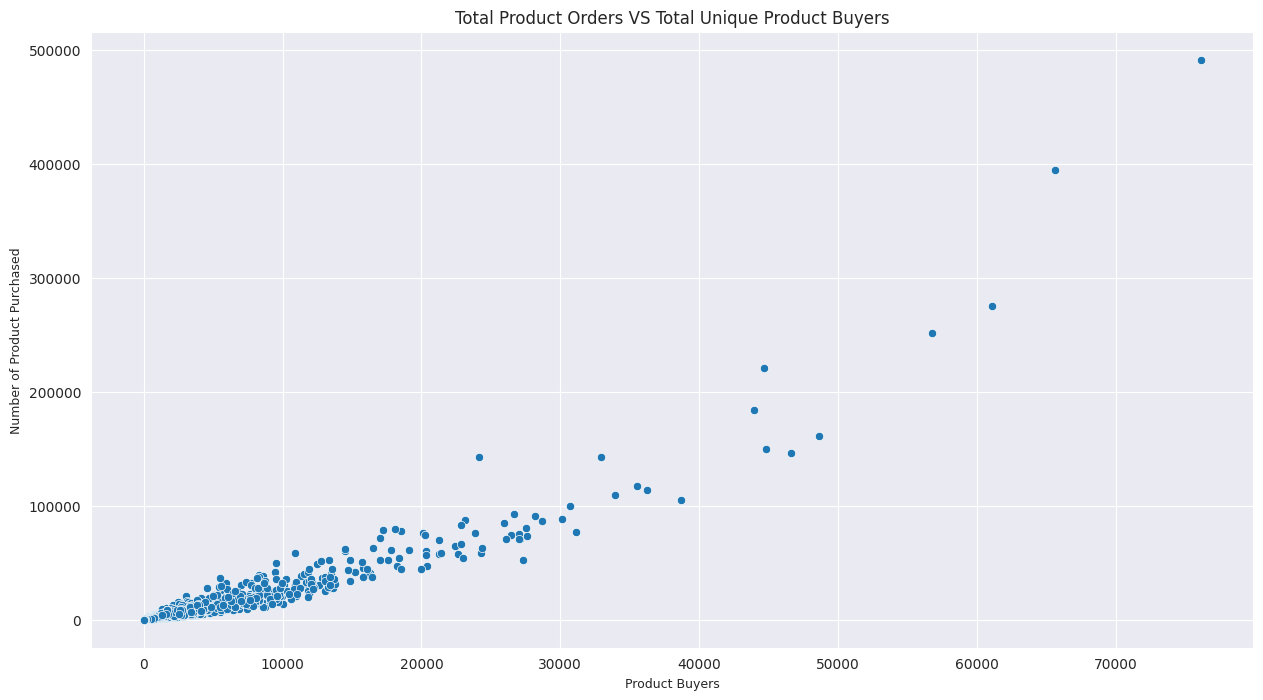

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

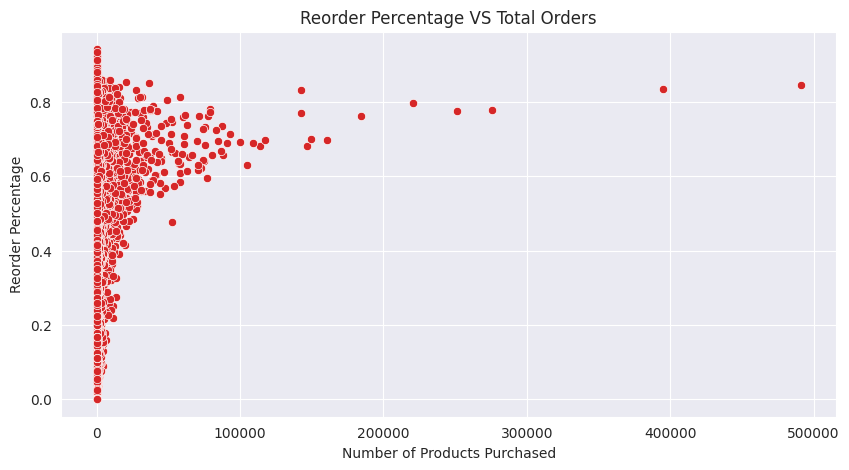

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

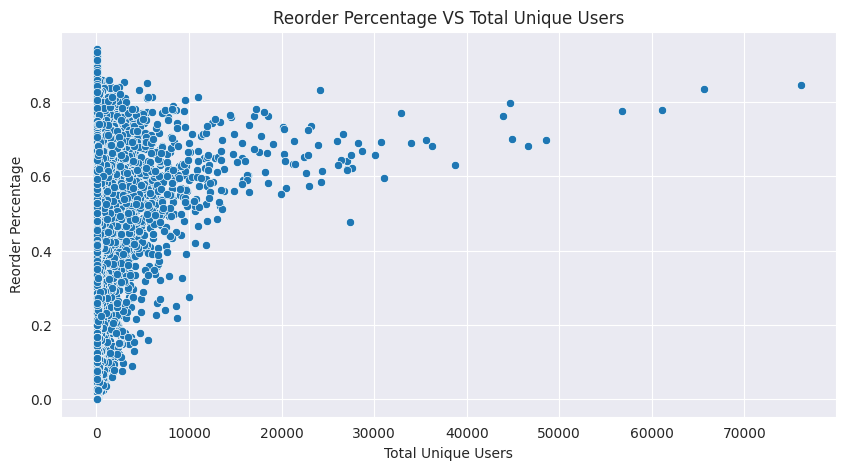

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

In [ ]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


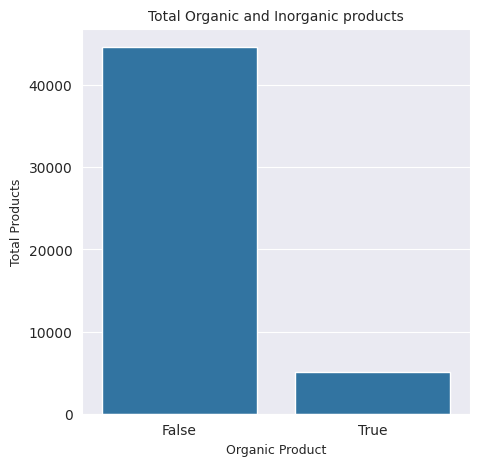

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

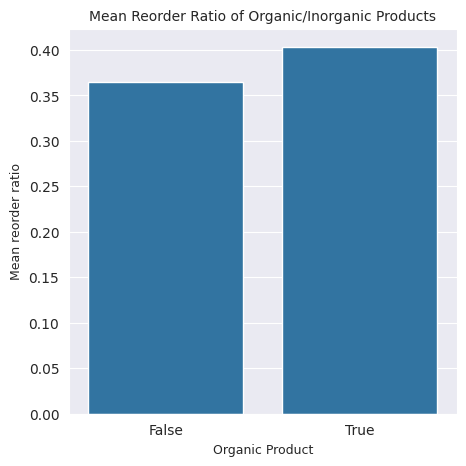

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

In [ ]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


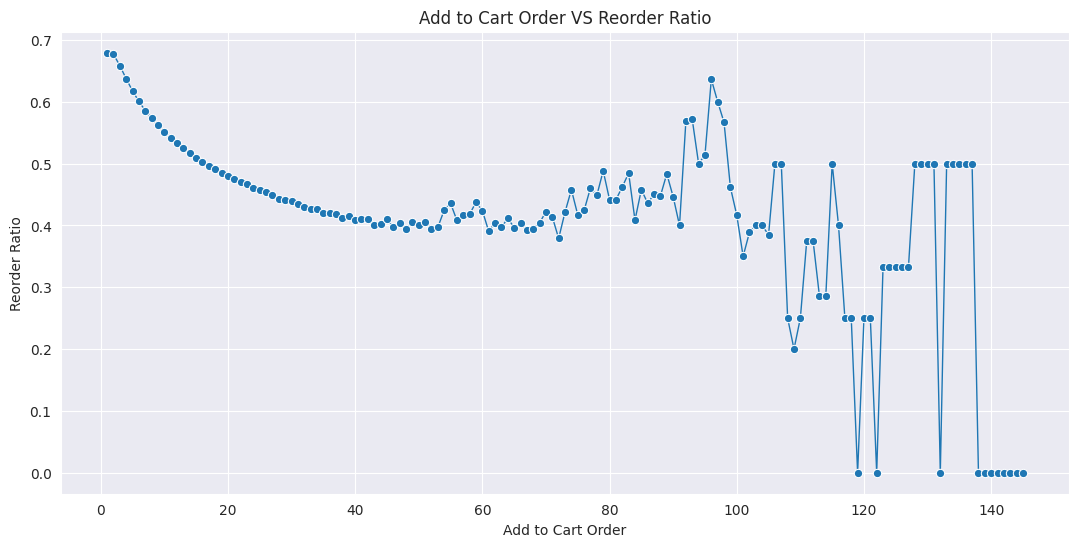

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

In [ ]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

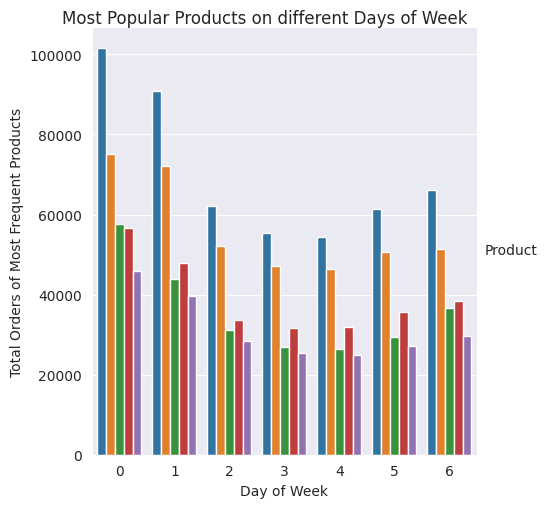

In [ ]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")